In [1]:
# importing all libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import plotting
plt.style.use('fivethirtyeight')

# for interarctive visualziations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


In [6]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df1 = ff.create_table(df.head())
py.iplot(df1)

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:>

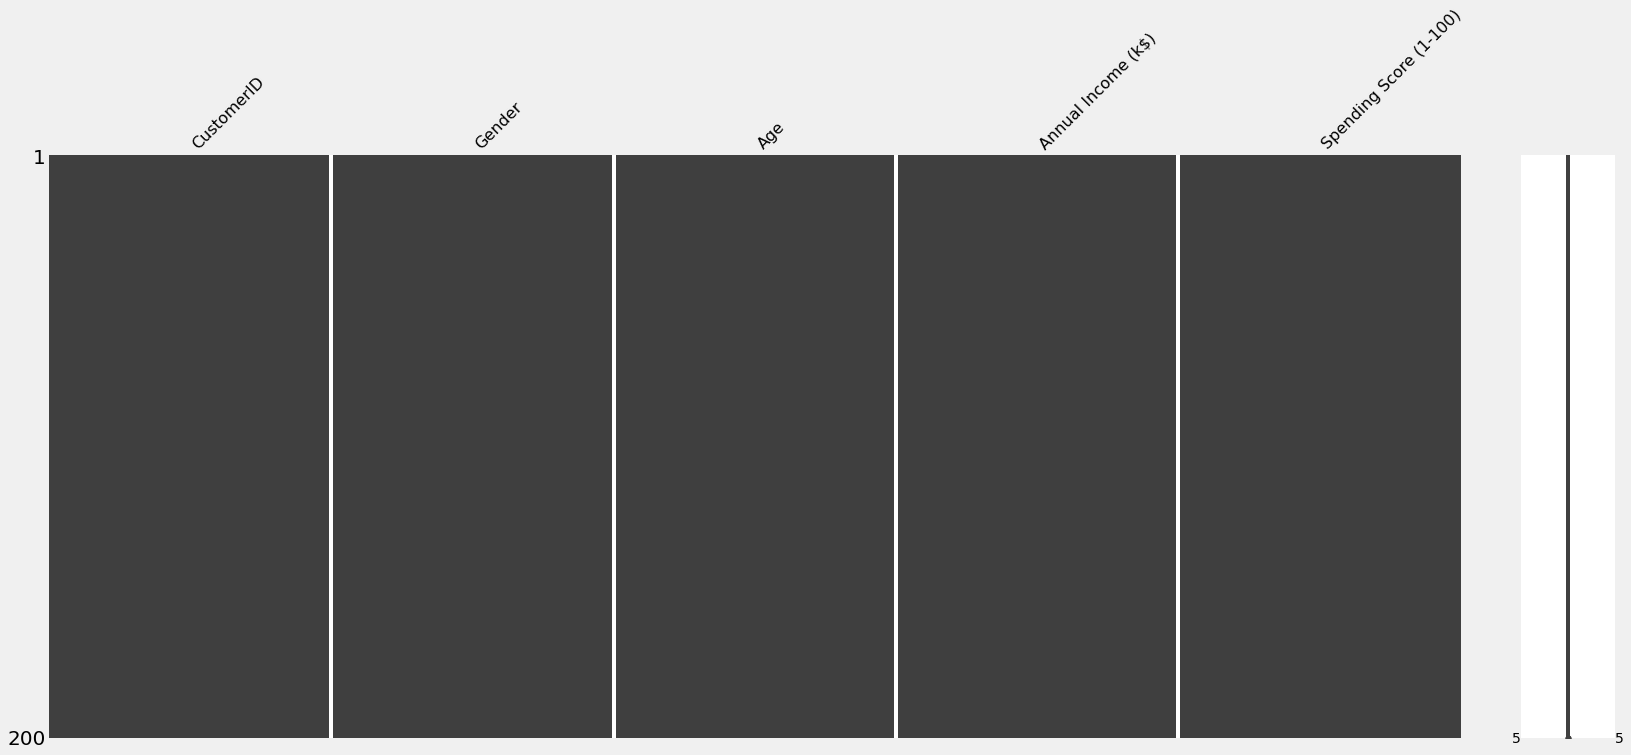

In [10]:
# check for any missing values
!pip install missingno
import missingno as msno
msno.matrix(df)

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

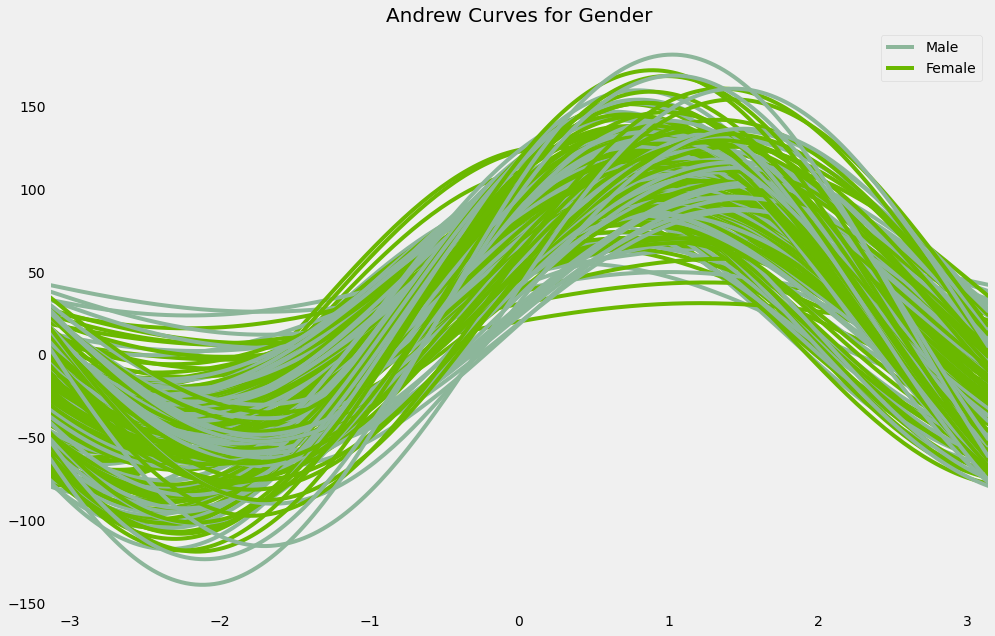

In [14]:
# In data visualization, an Andrews plot or Andrews curve is a way to visualize structure in high-dimensional data. It is basically a rolled-down, non-integer version of the Kent–Kiviat radar m chart, or a smoothed version of a parallel coordinate plot.
plt.figure(figsize=(15,10))
plotting.andrews_curves(df.drop('CustomerID',axis=1),'Gender')
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

It has been shown the Andrews curves are able to preserve means, distance (up to a constant) and variances. Which means that Andrews curves that are represented by functions close together suggest that the corresponding data points will also be close together

Text(0, 0.5, 'Count')

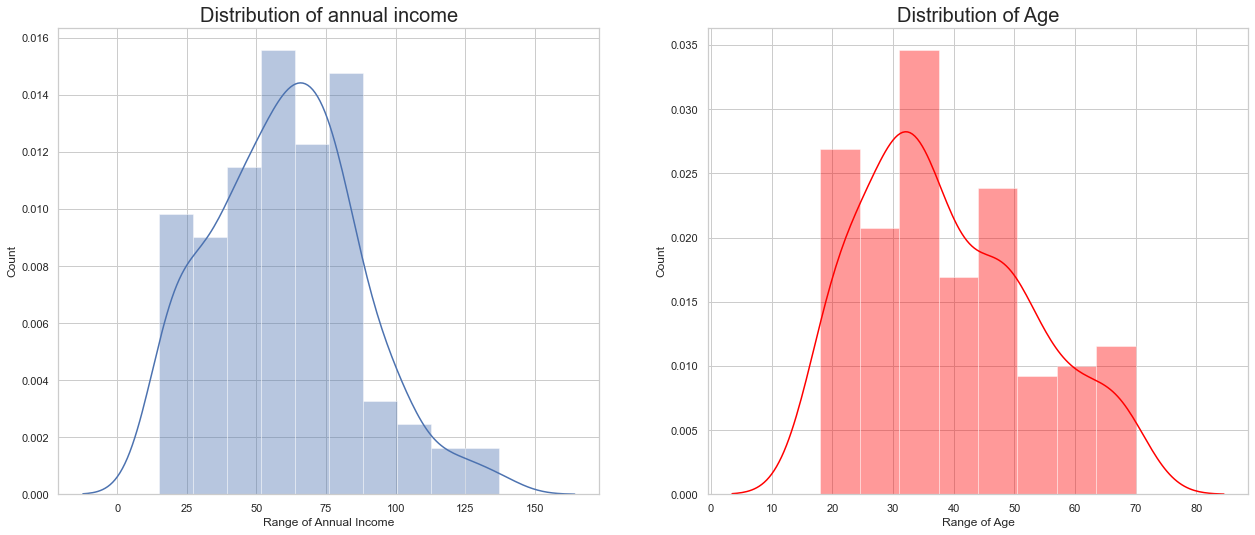

In [20]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(19,8))
plt.subplot(1,2,1)
sns.set(style='whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of annual income',fontsize=20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.set(style='whitegrid')
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age',fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots,

we can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

Taking inferences about the Customers.

The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in umber as compared to the Middle aged people.

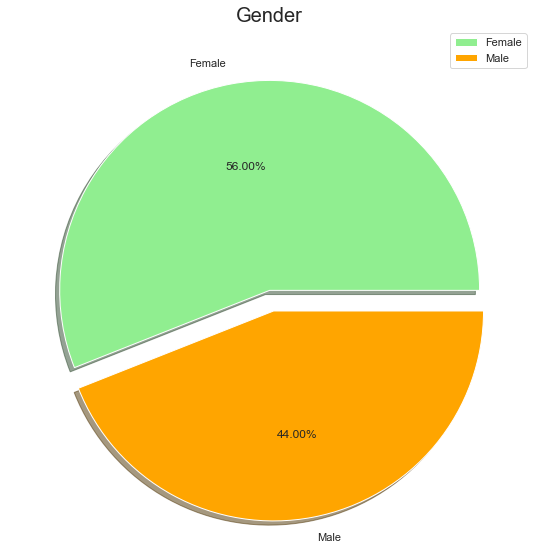

In [26]:
# now visualizaing the gender column 

labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


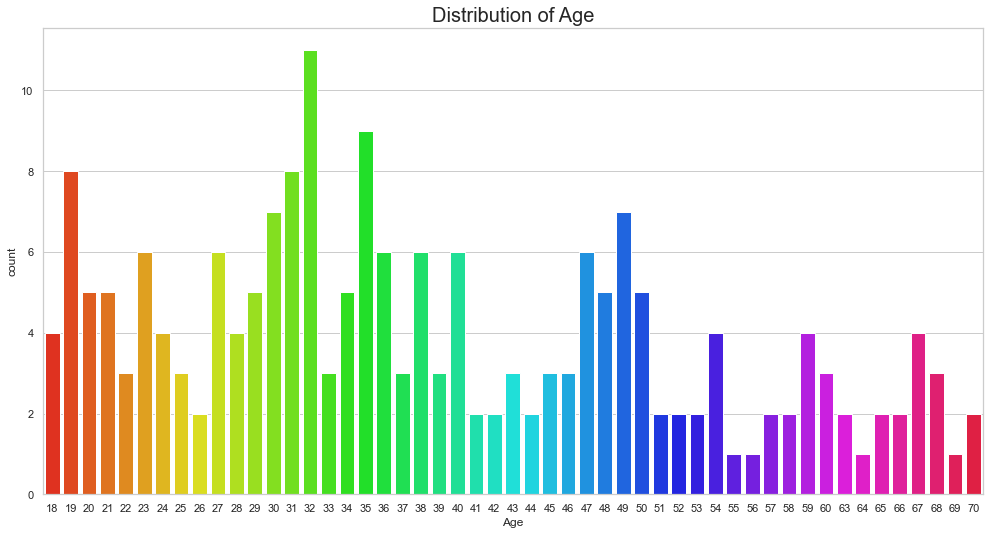

In [29]:
# now lets see the distribution of age
plt.figure(figsize = (15,8))
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize =20)
plt.show()

By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

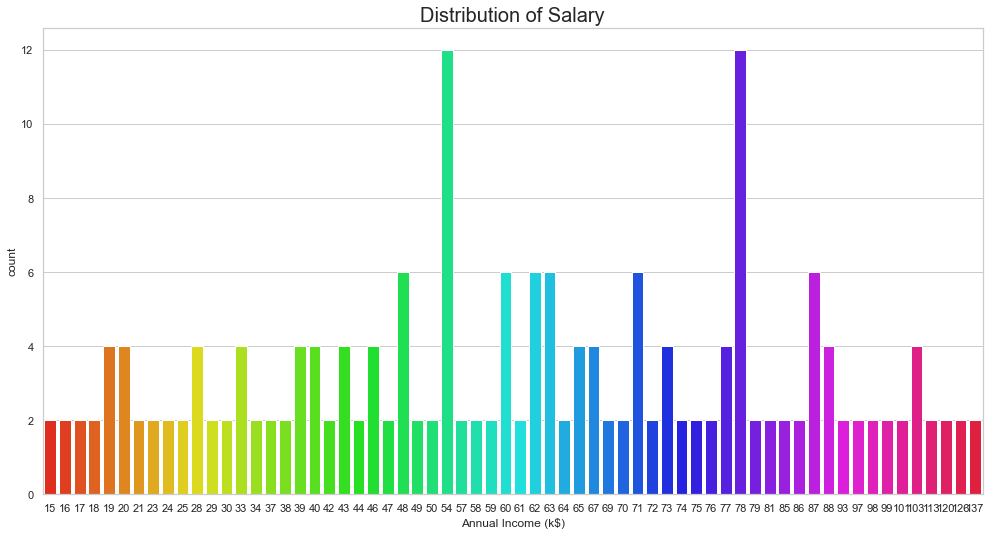

In [30]:
# now lets find the distribution of salary
plt.figure(figsize = (15,8))
sns.countplot(df['Annual Income (k$)'], palette = 'hsv')
plt.title('Distribution of Salary', fontsize =20)
plt.show()

Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars. There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.

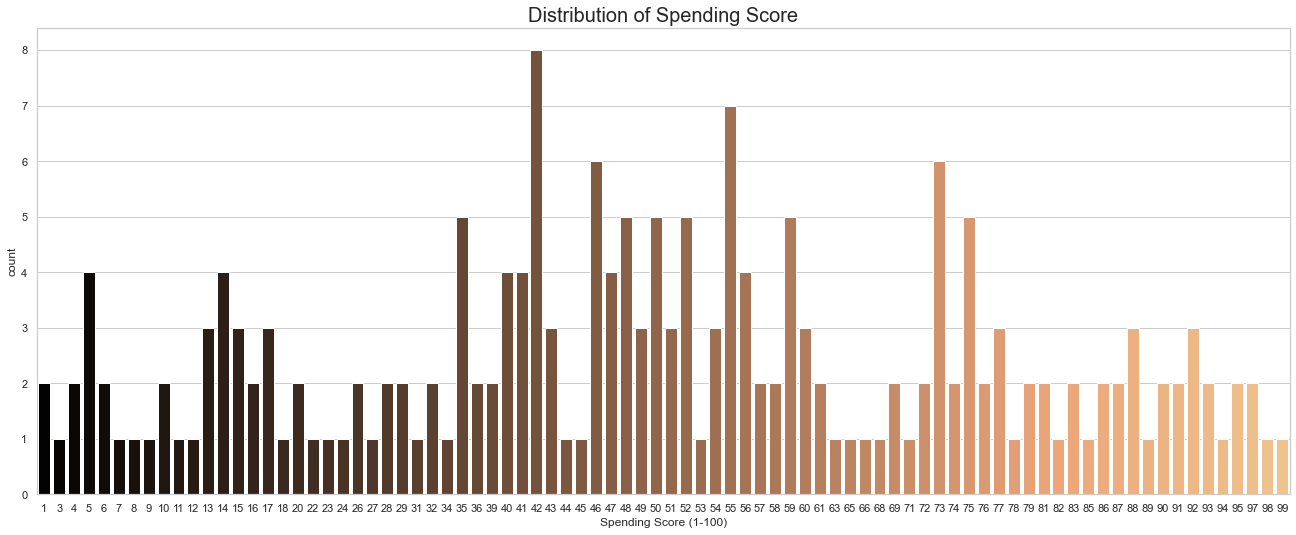

In [32]:
# distribution of spending score
plt.figure(figsize=(20,8))
sns.countplot(df['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60. Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

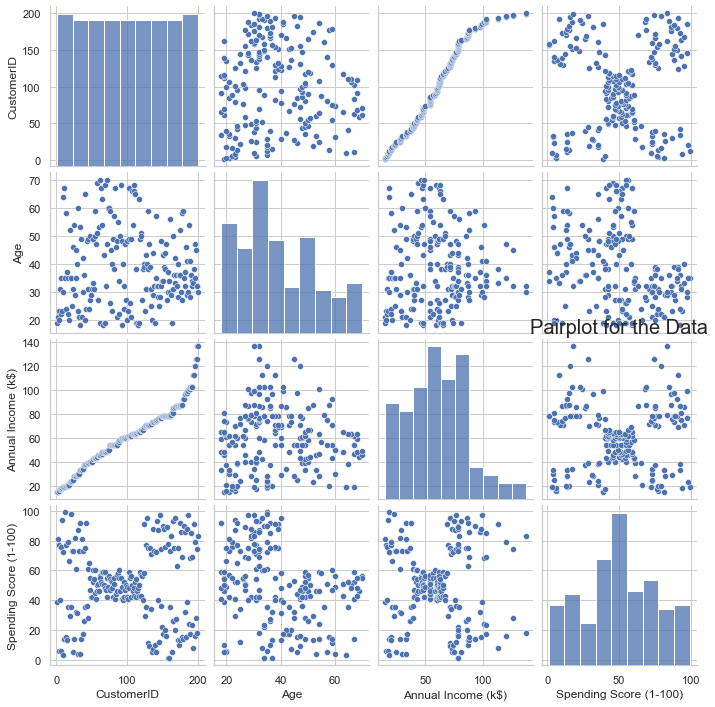

In [33]:
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()


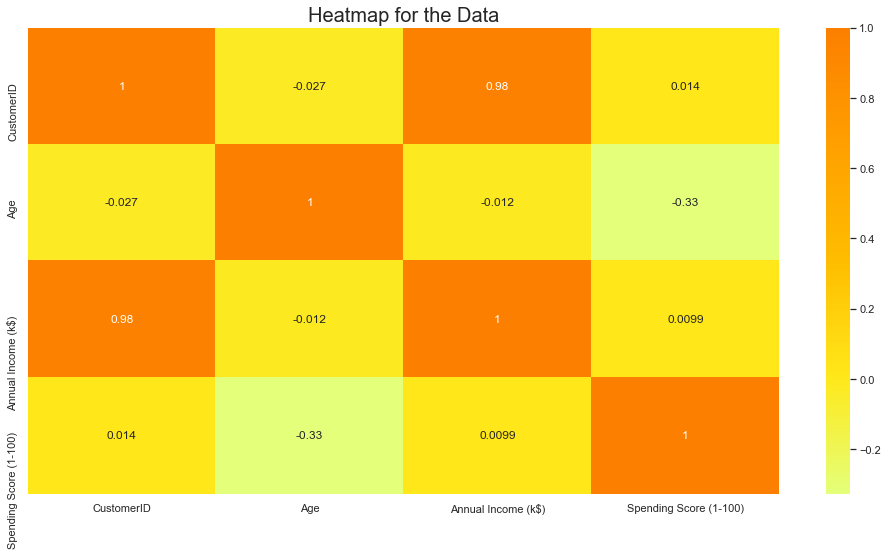

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

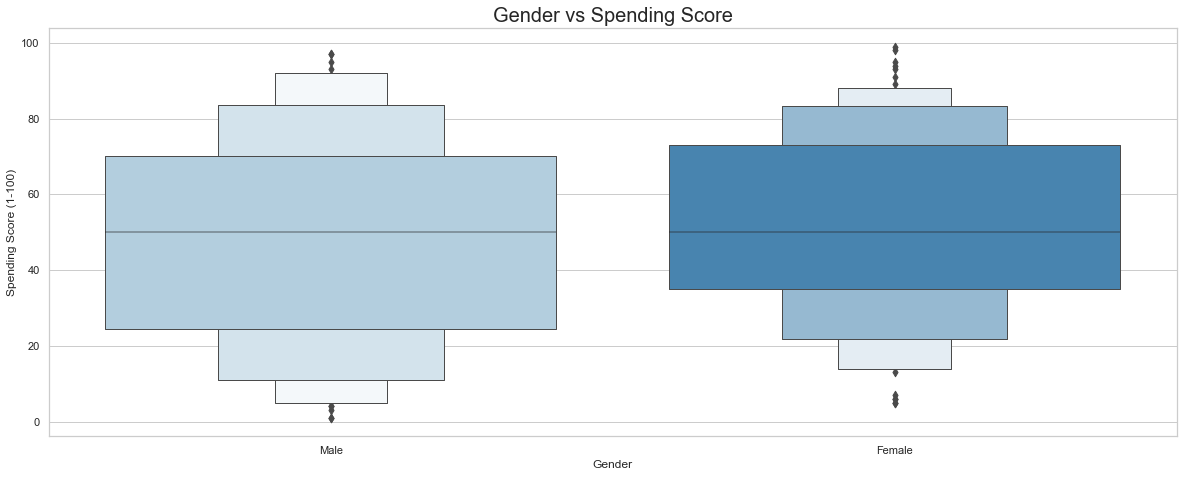

In [41]:
# Gender vs Spending Score
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(df['Gender'], df['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

i-variate Analysis between Gender and Spending Score,

It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders.

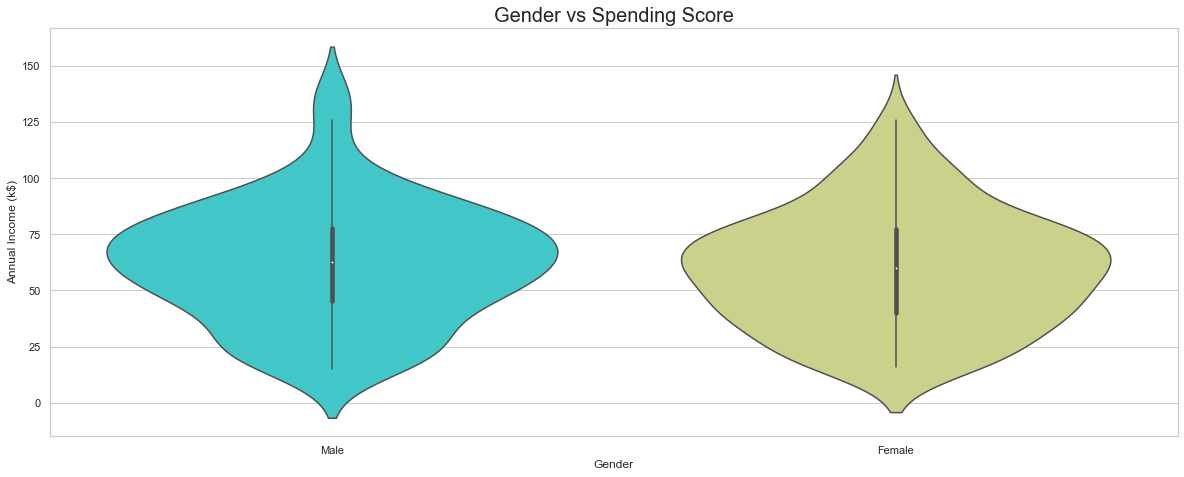

In [43]:
# Gender vs Annual Income
plt.figure(figsize=(18,7))
sns.violinplot(df['Gender'], df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()


Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.

There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.

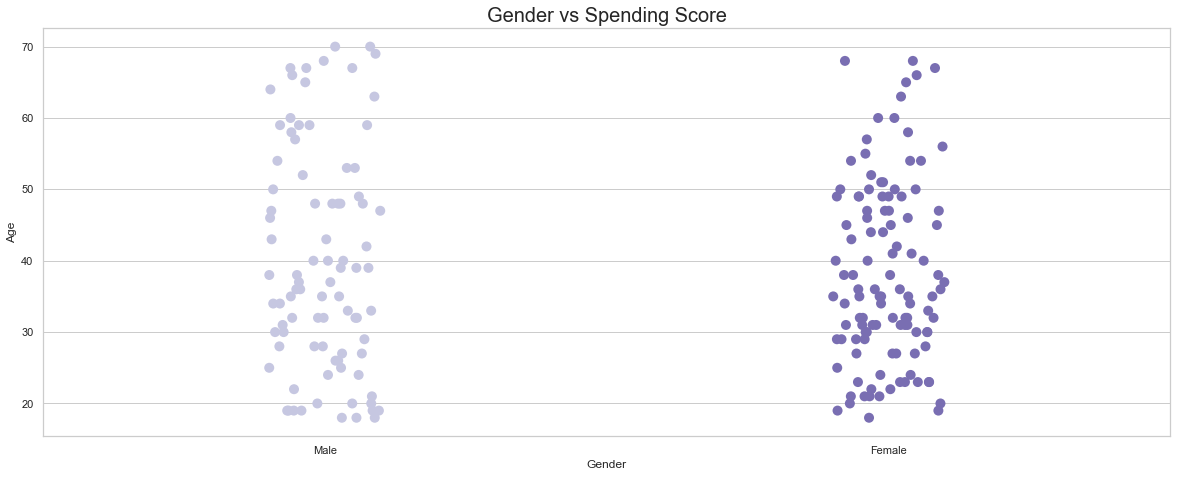

In [48]:
# Gender vs Age distribution
plt.figure(figsize= (18,7))
sns.stripplot(df['Gender'], df['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

- so we can see the distibution of Males and Females. we can observe there are more young females present and more number of old males are present habing age greater than 70.

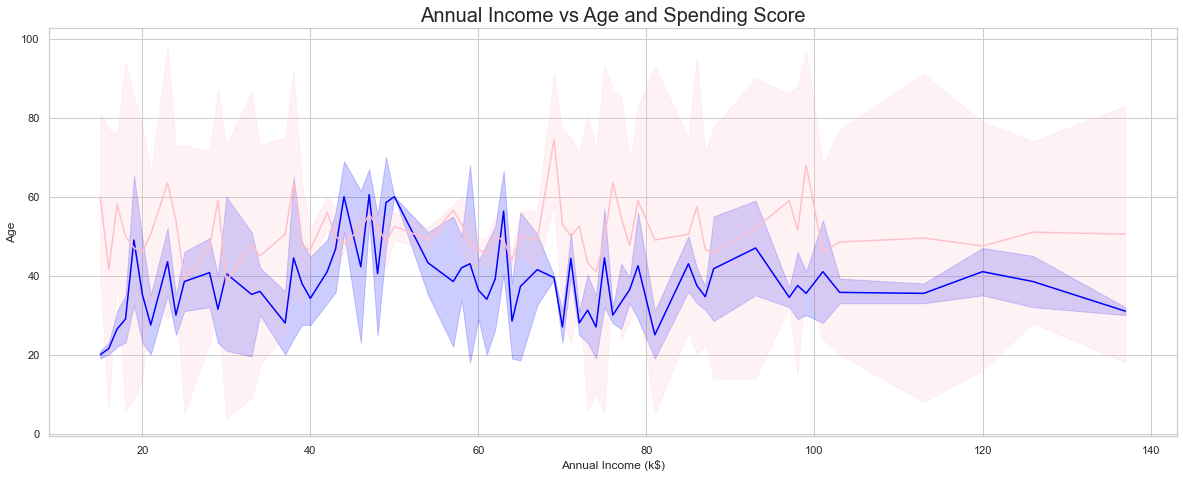

In [51]:
# annual income vs Age and Spending Score
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']
sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a pink color. shows how Age and Spending Varies with Annual Income.



In [53]:
# now lets start the clustering analysis

x = df.iloc[ :,[3,4]].values

print(x.shape)

(200, 2)


In [73]:
# so now standardizing the data before performing clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_new = scaler.fit_transform(x)


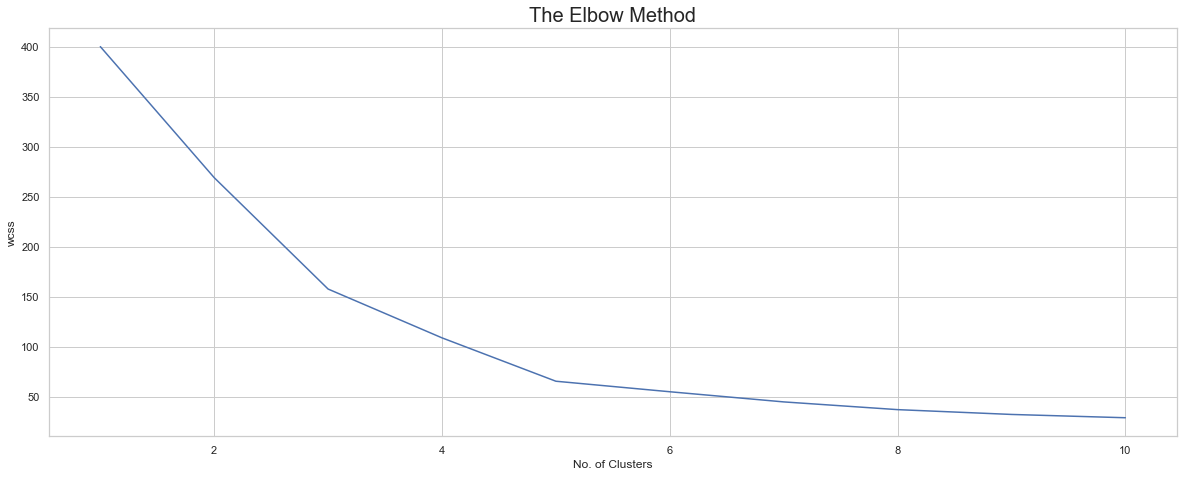

In [75]:
# using elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i,init = 'k-means++',max_iter=300, n_init =10, random_state=0)
    km.fit(x_new)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


according to the elbow method 5 would be favourable number of clusters as according to the grah there is start of smooth convergence from 5

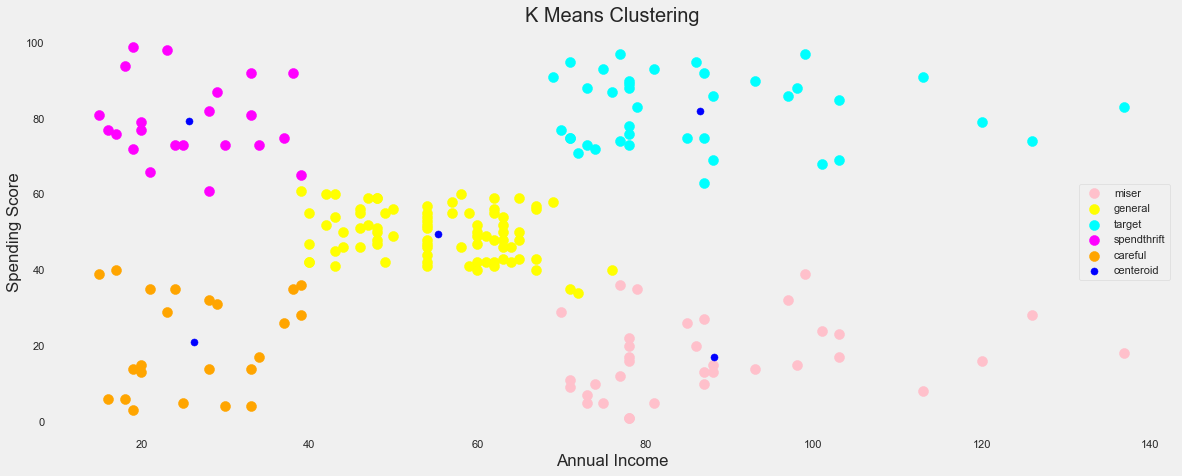

In [84]:
# visualizing the clusters

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift, Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

- Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other

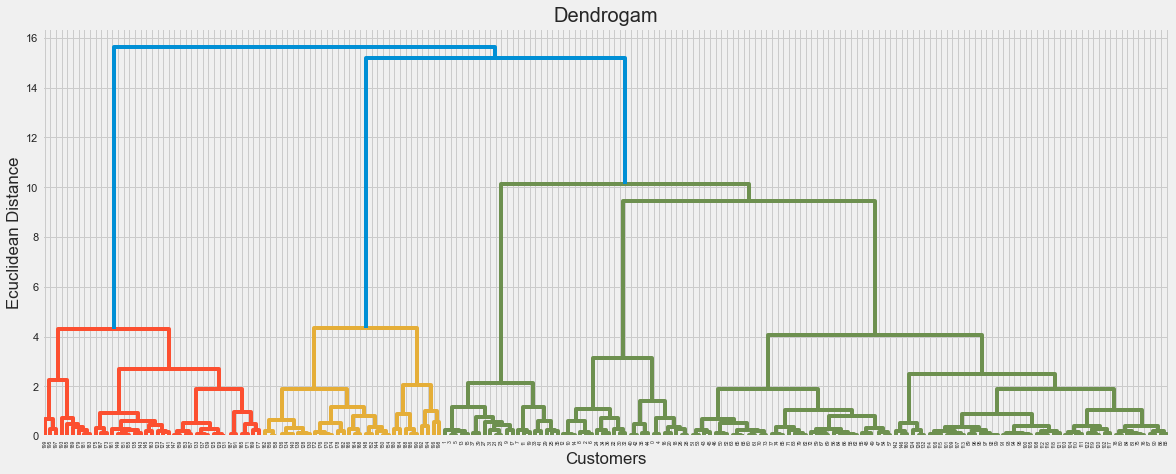

In [89]:
# using dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x_new, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

- so optimal number of clusters should be 5 according to this

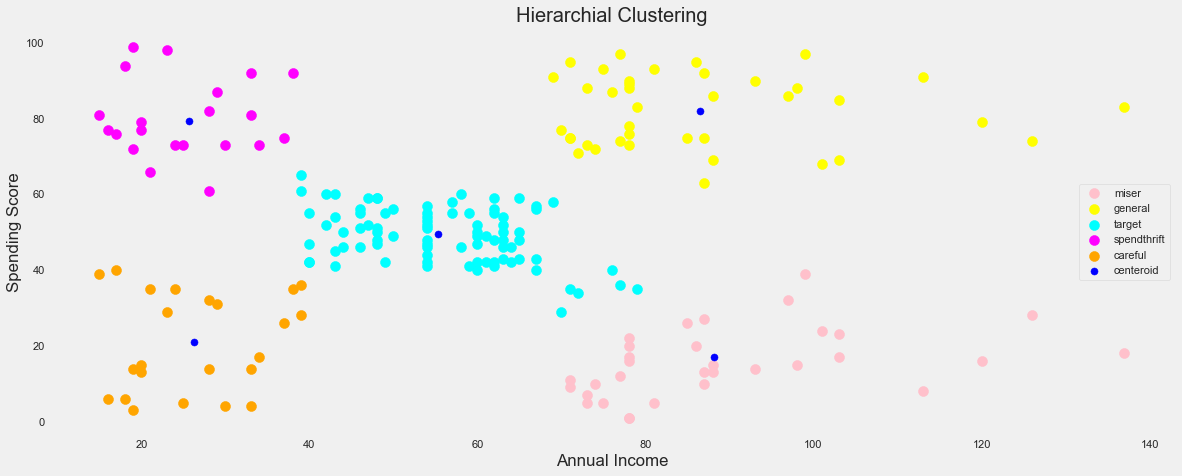

In [88]:
# visualizing the clusters of hierachial clustering 

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x_new)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


Clusters of Customers Based on their Ages



In [92]:
x = df.iloc[:, [2, 4]].values
x.shape

(200, 2)

In [95]:
# standardizing the data
scaler = StandardScaler()
x_new = scaler.fit_transform(x)


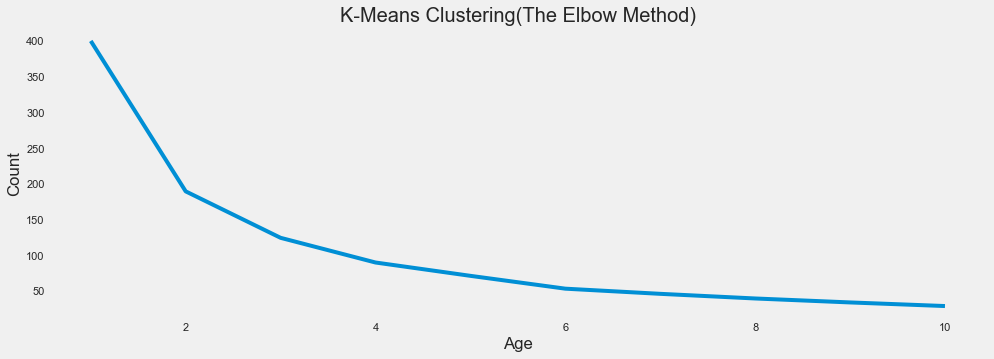

In [96]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_new)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

- hence optimal number of clusters can be taken as 4 for this case.

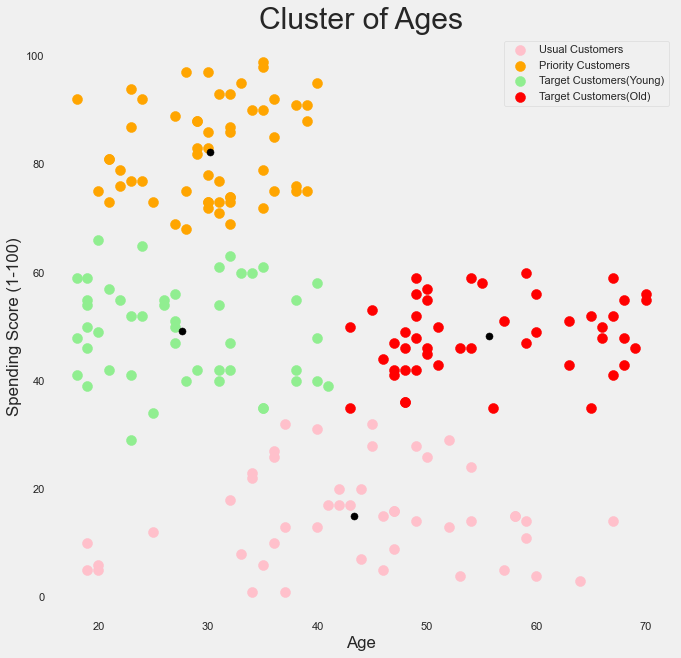

In [99]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.

#### THANK YOU 